In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [16]:
weather_info = pd.read_csv('input/london-weather-data/london_weather.csv')
print(weather_info)

print(weather_info.shape)
print(weather_info.head)



           date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0      19790101          2.0       7.0              52.0       2.3       -4.1   
1      19790102          6.0       1.7              27.0       1.6       -2.6   
2      19790103          5.0       0.0              13.0       1.3       -2.8   
3      19790104          8.0       0.0              13.0      -0.3       -2.6   
4      19790105          6.0       2.0              29.0       5.6       -0.8   
...         ...          ...       ...               ...       ...        ...   
15336  20201227          1.0       0.9              32.0       7.5        7.5   
15337  20201228          7.0       3.7              38.0       3.6        1.1   
15338  20201229          7.0       0.0              21.0       4.1        2.6   
15339  20201230          6.0       0.4              22.0       5.6        2.7   
15340  20201231          7.0       1.3              34.0       1.5       -0.8   

       min_temp  precipitat

In [17]:
weather_info.info()
weather_info.describe().T



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,count,mean,std,min,25%,50%,75%,max
date,15341.0,1.999567e+07,121217.558277,19790101.0,19890702.0,20000101.0,20100702.0,20201231.0
cloud_cover,15322.0,5.268242e+00,2.070072,0.0,4.0,6.0,7.0,9.0
sunshine,15341.0,4.350238e+00,4.028339,0.0,0.5,3.5,7.2,16.0
global_radiation,15322.0,1.187570e+02,88.898272,8.0,41.0,95.0,186.0,402.0
max_temp,15335.0,1.538878e+01,6.554754,-6.2,10.5,15.0,20.3,37.9
mean_temp,15305.0,1.147551e+01,5.729709,-7.6,7.0,11.4,16.0,29.0
min_temp,15339.0,7.559867e+00,5.326756,-11.8,3.5,7.8,11.8,22.3
precipitation,15335.0,1.668634e+00,3.738540,0.0,0.0,0.0,1.6,61.8
pressure,15337.0,1.015366e+05,1049.722604,95960.0,100920.0,101620.0,102240.0,104820.0
snow_depth,13900.0,3.798561e-02,0.545633,0.0,0.0,0.0,0.0,22.0


In [18]:
weather_info['year'] = weather_info['date'].astype(str).str[:4]
weather_info['month'] = weather_info['date'].astype(str).str[4:6]
weather_info['date'] = weather_info['date'].astype(str).str[6:]

weather_info[['date', 'month', 'year']] = weather_info[['date', 'month', 'year']].astype(int)
weather_features = weather_info.select_dtypes(exclude = 'object').columns



In [19]:
for year_x_axis in weather_features:
  print(year_x_axis, len(weather_info[year_x_axis].unique())) 
london_weather_monthly_df = weather_info.groupby(['year', 'month'], as_index = False)[weather_features].mean()
london_weather_yearly_df = london_weather_monthly_df.groupby(['year'], as_index = False)[['max_temp', 'mean_temp', 'min_temp', 'global_radiation']].mean()



date 31
cloud_cover 11
sunshine 160
global_radiation 361
max_temp 375
mean_temp 322
min_temp 297
precipitation 263
pressure 643
snow_depth 20
year 42
month 12


In [20]:
layout = go.Layout(
    title = "Temperature of London from 1970 to 2020",
    plot_bgcolor = "#FFF",
    hovermode = "x",
    hoverdistance = 100,
    spikedistance = 1000,
    xaxis=dict(
        title = "Years (1979 to 2020)",
        linecolor = "dimgray",
        showgrid = False,
        showspikes = True,
        spikethickness = 1,
        spikedash = 'dash',
        spikecolor = 'darkgrey',
        spikemode = 'across',
        mirror = True
    ),
    yaxis=dict(
        title = "Temperature in °C",
        linecolor = "dimgray",
        mirror = True
    )
)

plot = go.Figure(data = [go.Scatter(
    x = london_weather_yearly_df.year,
    y = london_weather_yearly_df.max_temp,
    name = 'Maximum',
    mode = 'lines+markers',
    line_color = 'orange'),
    go.Scatter(
    x = london_weather_yearly_df.year,
    y = london_weather_yearly_df.min_temp,
    name = 'Minimum',
    mode = 'lines+markers',
    line_color = 'maroon')
    ],
    layout = layout)
plot.show() #Date : 10/09/2023


In [21]:
london_clouds = dict()
london_clouds['Barely cloudy'] = weather_info['cloud_cover'][weather_info['cloud_cover'].isin([0,1,2])].count()
london_clouds['Partly cloudy'] = weather_info['cloud_cover'][weather_info['cloud_cover'].isin([3,4,5])].count()
london_clouds['Mostly cloudy'] = weather_info['cloud_cover'][weather_info['cloud_cover'].isin([6,7,8])].count()
london_clouds['Obstructed view'] = weather_info['cloud_cover'][weather_info['cloud_cover'] == 9].count()


In [22]:
fig = px.pie(values=list(london_clouds.values()), names=list(london_clouds.keys()), 
              title = "London's Cloud Cover Status(1979-2020)",
              color_discrete_sequence=['#afafaf', '#cfcfcf', '#efefef', '#000000'])
fig.update_layout(width = 700, legend_title_text = 'Cloud status', font = dict(size = 14))
fig.show()

In [23]:
london_weather_monthly_df = weather_info.groupby(['year', 'month'], as_index = False)[weather_features].mean()

In [24]:
london_weather_monthly_df['snow_depth'] = london_weather_monthly_df.snow_depth.fillna(0)

In [25]:
london_weather_monthly_df['date'] = pd.to_datetime(london_weather_monthly_df[['year', 'month']].assign(DAY = 1))

In [26]:
monthly_data_df1 = london_weather_monthly_df.copy()

In [27]:
monthly_data_df1.month = monthly_data_df1['month'].astype(int)
monthly_data_df1['month'] = monthly_data_df1['month'].apply(lambda x: calendar.month_abbr[x])

NameError: name 'calendar' is not defined

In [ ]:
fig = px.scatter(monthly_data_df1, x="year", y="month", color = 'snow_depth', color_continuous_scale=['lightblue', 'mediumblue'],
	         size="snow_depth", size_max=60, opacity = 0.6, title = "Snow depth in London")
fig.update_layout(height = 600, width = 1000, plot_bgcolor = 'white')
fig.update_xaxes(title = 'Years (1979-2020)', showgrid = False, linecolor = 'dimgrey', mirror = True)
fig.update_yaxes(title = 'Months', showgrid = False, zeroline = False, linecolor = 'dimgrey', mirror = True)
fig.update_coloraxes(colorbar = dict(title = 'Snow depth(cm)'))
fig.show()

In [ ]:
layout = go.Layout(
    title = "London's Global Radiation",
    plot_bgcolor = '#010',
    hovermode = 'x',
    xaxis = dict(
        title = 'Years (1979-2020)',
        linecolor = 'dimgrey',
        showgrid = False,
        showspikes = True,
        spikedash = 'dot',
        spikecolor = 'darkgrey',
        spikemode = 'across',
        spikethickness = 1,
        mirror = True
    ),
    yaxis = dict(
        title = 'Radiation (W/m2)',
        linecolor = 'dimgrey',
        showgrid = False,
        mirror = True
    )
)

plot = go.Figure(data = [go.Scatter(
    x = london_weather_yearly_df.year,
    y = london_weather_yearly_df.global_radiation,
    mode = 'lines+markers',
    marker = dict(color = london_weather_yearly_df.global_radiation, colorscale = 'ylorrd', size = 10),
    line_color = 'lightgrey')],
    layout = layout)
plot.show()

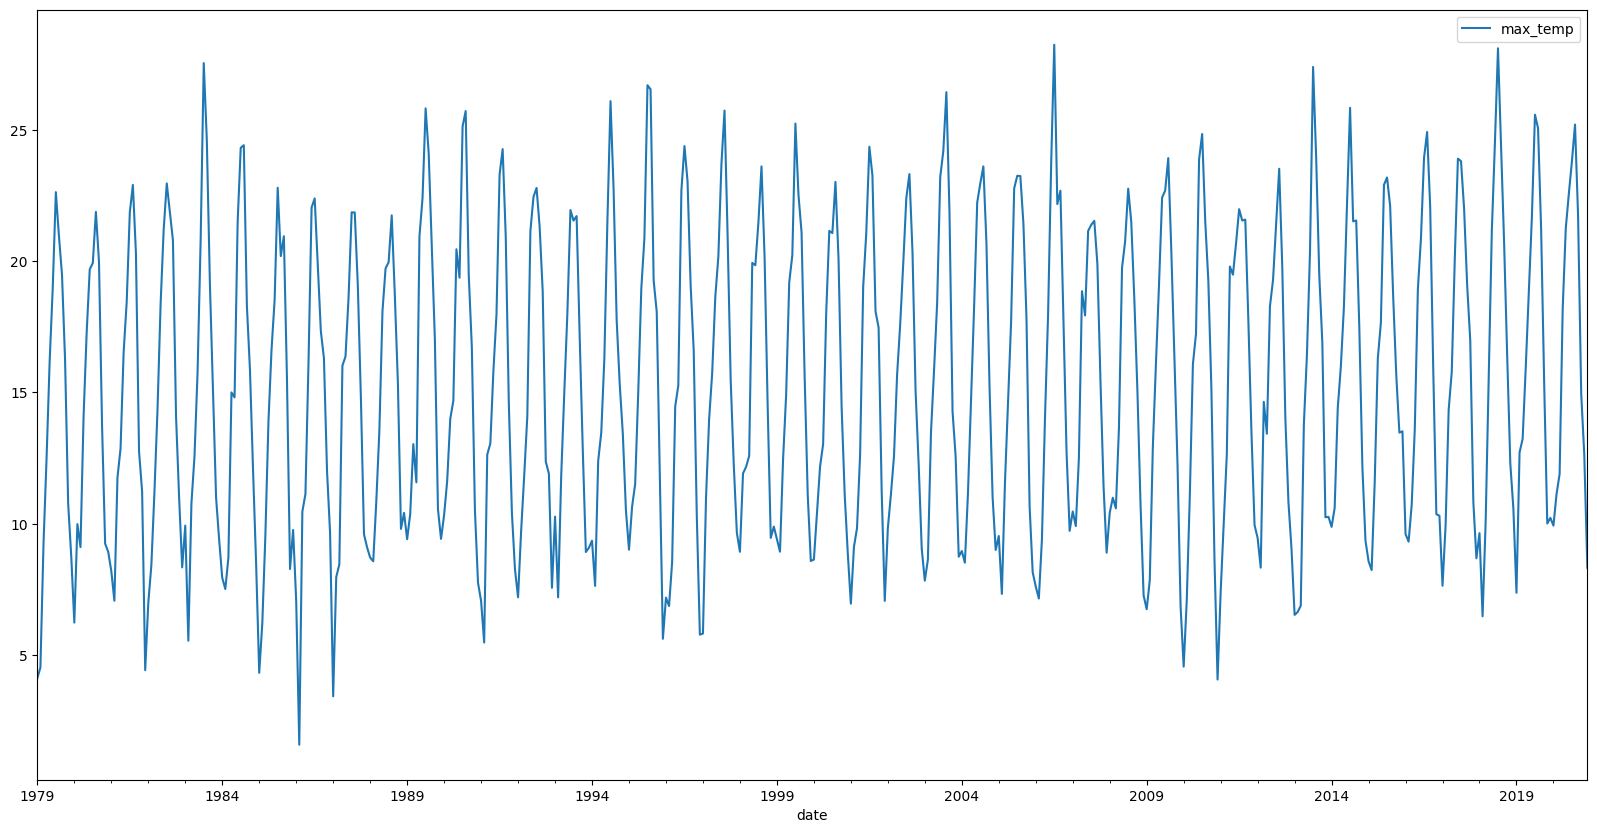

In [ ]:
london_weather_monthly_df.plot(x = 'date', y = ['max_temp'], kind = 'line', figsize = (20,10))
plt.show()

In [ ]:
london_weather_monthly_df.plot(x = 'date', y = ['min_temp'], kind = 'line', figsize = (20,10))
plt.show()

NameError: name 'london_weather_monthly_df' is not defined